In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import settings

In [74]:
df = pd.read_csv(settings.DATA_PATH / 'world_bank' / 'API_4_DS2_en_csv_v2_3160069.csv', skiprows=4)
df = df.drop(columns=['Unnamed: 65'])

In [75]:
df.shape

(43092, 65)

In [76]:
df['Country Name'].unique().size


266

In [77]:
df['Indicator Code'].unique().size

162

In [78]:
year_min = df.columns[4]
year_max = df.columns[-1]
print(f'The dataset holds data from the year {year_min} to the year {year_max}.')

The dataset holds data from the year 1960 to the year 2020.


Most of the indicators are provided separately form female and male which allows a distinction by gender. Further, the matadata includes an income group for each country.

Some of the features are the following.

One of the main challenges in this project will be the amount of missing data which we can observe in the following heatmap where the dark spots show the missing data.

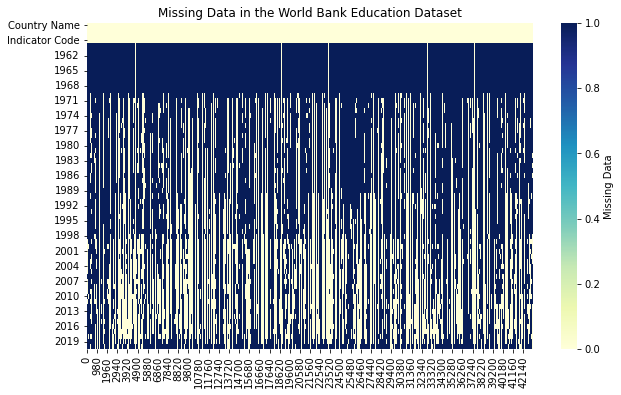

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().T,
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'}).set(title='Missing Data in the World Bank Education Dataset')
plt.show()

In [80]:
columns_to_remove = ['Country Name', 'Country Code', 'Indicator Code'] + [str(year) for year in range(1960, 1991)]
d1 = df.drop(columns=columns_to_remove).notna()
d1['Indicator Name'] = df['Indicator Name']
d1 = d1.groupby(by='Indicator Name').mean()

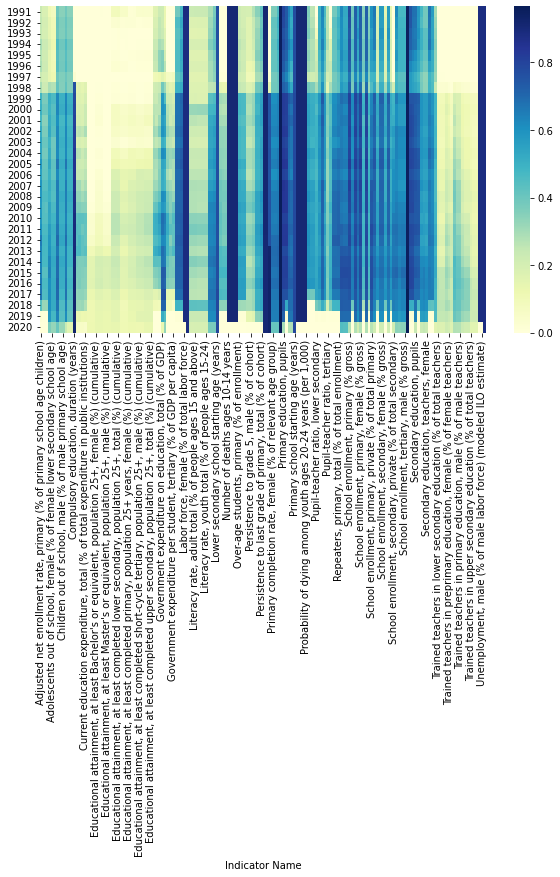

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(d1.T, cmap='YlGnBu')
plt.show()

In [82]:
m = d1.mean(axis=1)
m = m[m > 0.5]
print(len(m))
for ind in m.index:
    print(ind)

69
Children out of school (% of primary school age)
Children out of school, primary
Compulsory education, duration (years)
Government expenditure on education, total (% of GDP)
Gross intake ratio in first grade of primary education, female (% of relevant age group)
Gross intake ratio in first grade of primary education, male (% of relevant age group)
Gross intake ratio in first grade of primary education, total (% of relevant age group)
Labor force, female (% of total labor force)
Labor force, total
Lower secondary completion rate, female (% of relevant age group)
Lower secondary completion rate, male (% of relevant age group)
Lower secondary completion rate, total (% of relevant age group)
Lower secondary school starting age (years)
Number of deaths ages 10-14 years
Number of deaths ages 15-19 years
Number of deaths ages 20-24 years
Number of deaths ages 5-9 years
Population ages 0-14 (% of total population)
Population ages 15-64 (% of total population)
Preprimary education, duration 

In [83]:
columns_to_remove = [year for year in range(1960, 1971)]
[label for label in df['Indicator Name']
    if label.startswith('Literacy') 
        or label.startswith('Trained Teachers')]

['Literacy rate, adult total (% of people ages 15 and above)',
 'Literacy rate, adult male (% of males ages 15 and above)',
 'Literacy rate, adult female (% of females ages 15 and above)',
 'Literacy rate, youth total (% of people ages 15-24)',
 'Literacy rate, youth male (% of males ages 15-24)',
 'Literacy rate, youth (ages 15-24), gender parity index (GPI)',
 'Literacy rate, youth female (% of females ages 15-24)',
 'Literacy rate, adult total (% of people ages 15 and above)',
 'Literacy rate, adult male (% of males ages 15 and above)',
 'Literacy rate, adult female (% of females ages 15 and above)',
 'Literacy rate, youth total (% of people ages 15-24)',
 'Literacy rate, youth male (% of males ages 15-24)',
 'Literacy rate, youth (ages 15-24), gender parity index (GPI)',
 'Literacy rate, youth female (% of females ages 15-24)',
 'Literacy rate, adult total (% of people ages 15 and above)',
 'Literacy rate, adult male (% of males ages 15 and above)',
 'Literacy rate, adult female (%

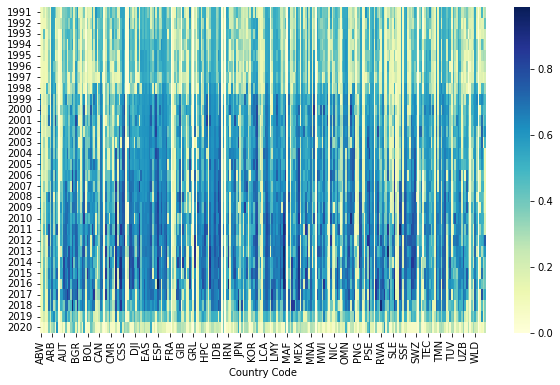

In [84]:
columns_to_remove = ['Indicator Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d2 = df.drop(columns=columns_to_remove).notna()
d2['Country Code'] = df['Country Code']
d2 = d2.groupby(by='Country Code').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(d2.T, cmap='YlGnBu')
plt.show()

In [85]:
m = d2.mean(axis=1)
m = m[m > 0.5]
print(len(m))
for ind in m.index:
    print(ind)

112
ARB
AUT
AZE
BFA
BGR
BHR
BLZ
BRN
CEB
CHE
COL
CPV
CRI
CSS
CUB
CYP
CZE
DEU
DNK
DOM
EAP
EAR
EAS
ECA
ECS
ECU
EMU
ERI
ESP
EST
EUU
FCS
FIN
FRA
GHA
GRC
GTM
HIC
HPC
HUN
IBD
IBT
IDA
IDB
IDN
IDX
IRN
ISL
ITA
KGZ
KOR
KWT
LAC
LAO
LCN
LDC
LIC
LMC
LMY
LSO
LTE
LTU
LVA
MAC
MAR
MEA
MEX
MIC
MLT
MNA
MNG
MOZ
MRT
MUS
MYS
NAC
NER
NOR
OED
OMN
OSS
PER
POL
PRE
PRT
PRY
PSE
PSS
PST
QAT
ROU
SAS
SEN
SLV
SSA
SSF
SST
SVK
SVN
SWE
TEA
TEC
TGO
TLA
TMN
TSA
TSS
TUN
TUR
UMC
URY
WLD


In [104]:
countries = pd.read_csv(settings.DATA_PATH / 'countries.csv')

In [108]:
countries.head()

,country_name,country_code2,country_code3
0,Austria,AT,AUT
1,Belgium,BE,BEL
2,Bulgaria,BG,BGR
3,Croatia,HR,HRV
4,Cyprus,CY,CYP


In [109]:
countries.shape

(52, 3)

In [113]:
europe_codes = countries.country_code3.values
europe_codes

array(['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN',
       'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX',
       'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE',
       'ALB', 'AND', 'ARM', 'BLR', 'BIH', 'FRO', 'GEO', 'GIB', 'ISL',
       'IMN', 'XKX', 'LIE', 'MKD', 'MDA', 'MCO', 'MNE', 'NOR', 'RUS',
       'SMR', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'VAT'], dtype=object)

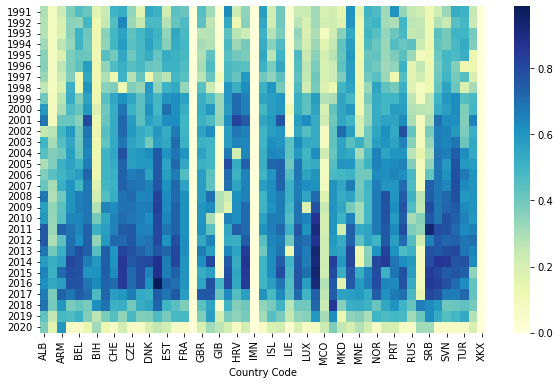

In [118]:
columns_to_remove = ['Indicator Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d3 = df[df['Country Code'].isin(europe_codes)]
d3 = d3.drop(columns=columns_to_remove).notna()
d3['Country Code'] = df['Country Code']
d3 = d3.groupby(by='Country Code').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(d3.T, cmap='YlGnBu')
plt.show()

In [ ]:
d1 = df.drop(columns=columns_to_remove).notna()
d1['Indicator Name'] = df['Indicator Name']
d1 = d1.groupby(by='Indicator Name').mean()

columns_to_remove = ['Country Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d3 = df[df['Indicator Code'].isin(europe_codes)]
d3 = d3.drop(columns=columns_to_remove).notna()
d3['Indicator Code'] = df['Indicator Code']
d3 = d3.groupby(by='Country Code').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(d3.T, cmap='YlGnBu')
plt.show()

In [120]:
columns_to_remove = ['Indicator Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d3 = df[df['Country Code'].isin(europe_codes)]
d3 = d3.drop(columns=columns_to_remove).notna()
d3

,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
810,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
811,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
812,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
813,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
814,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42440,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42441,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42442,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
